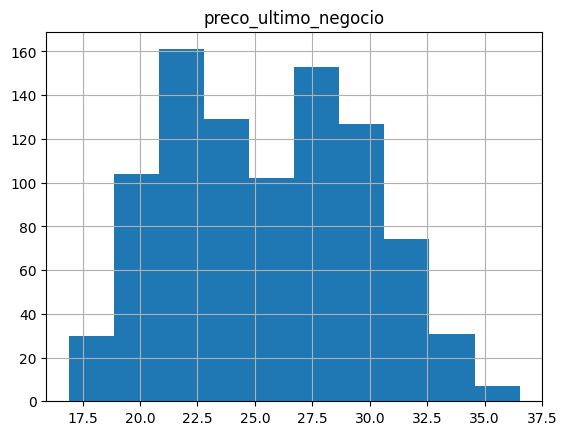

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
 
# Generate random data for the histogram
data = pd.read_csv('../dataset/dados_pregao_intb3.csv', header=0, parse_dates=True)
data = data[['data_pregao', 'preco_ultimo_negocio']]
data.set_index(['data_pregao'], inplace=True)
 

data.hist()
plt.show()

             preco_ultimo_negocio
data_pregao                      
2021-02-04                  19.74
2021-02-05                  20.00
2021-02-08                  19.29
2021-02-09                  20.00
2021-02-10                  19.50


<function matplotlib.pyplot.show(close=None, block=None)>

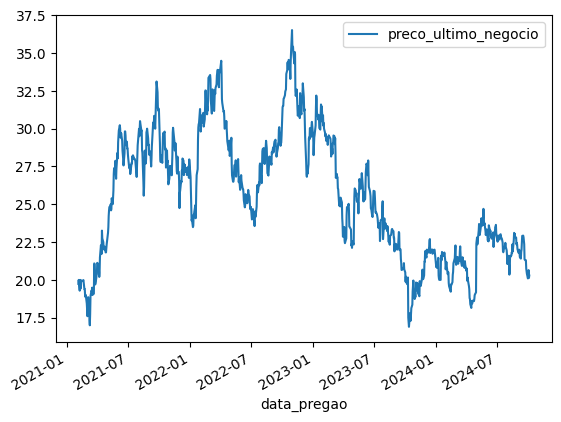

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('../dataset/dados_pregao_intb3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

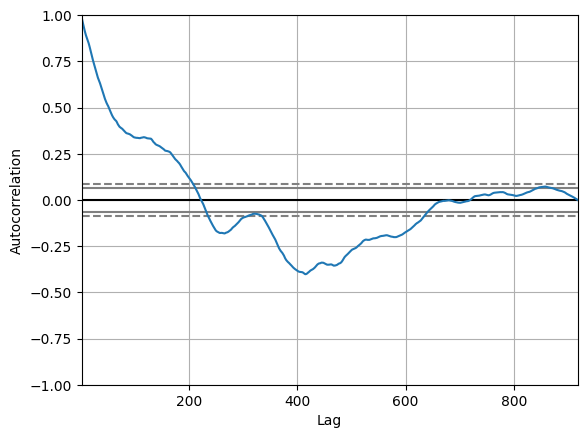

In [7]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [8]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [9]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1668.892, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1673.172, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1668.974, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1668.161, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1671.172, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1667.077, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1669.465, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1669.407, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1667.417, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1667.484, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1665.078, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1666.162, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1666.974, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1667.465, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0]          

predicted=21.752449, expected=21.290000
predicted=21.189491, expected=21.310000
predicted=21.359764, expected=21.850000
predicted=21.870122, expected=21.590000
predicted=21.558112, expected=21.780000
predicted=21.813461, expected=21.650000
predicted=21.620442, expected=21.630000
predicted=21.644352, expected=21.810000
predicted=21.817808, expected=21.220000
predicted=21.164925, expected=20.700000
predicted=20.685149, expected=20.950000
predicted=20.979860, expected=21.190000
predicted=21.194411, expected=20.920000
predicted=20.893961, expected=20.380000
predicted=20.346860, expected=20.460000
predicted=20.485328, expected=20.500000
predicted=20.489483, expected=19.800000
predicted=19.744736, expected=19.590000
predicted=19.602654, expected=19.220000
predicted=19.180396, expected=19.700000
predicted=19.763862, expected=19.680000
predicted=19.643147, expected=19.850000
predicted=19.884618, expected=20.350000
predicted=20.373748, expected=20.530000
predicted=20.532331, expected=21.100000


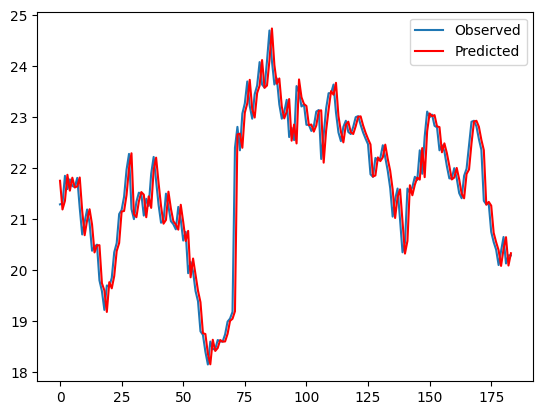

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()


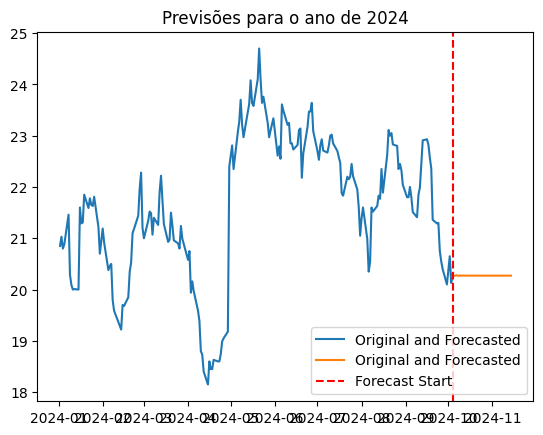

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preparar o modelo ARIMA e fazer as previsões para os próximos 30 dias
X = df.values
history = [x for x in X]
model = ARIMA(history, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

# Gerar datas futuras
last_date = df.index[-1]
future_dates = pd.date_range(last_date, periods=30, freq='B')

# Adicionar previsões ao DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])
df_with_forecast = pd.concat([df, forecast_df])

# Filtrar os dados apenas para o ano de 2024
df_2024 = df_with_forecast.loc['2024']

# Plotar os dados de 2024
plt.plot(df_2024, label='Original and Forecasted')
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Previsões para o ano de 2024')
plt.show()